Use scikit learn’s LogisticRegression class to model and make predictions on the following two datasets:

1) https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

Using the model, make predictions of the demand for bikes when the windspeed is minimum and maximum. Plot the ROC curve.

In [115]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_mldata
from sklearn import datasets
import tempfile
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [116]:
# read csv file
df_Bike=pd.read_csv('day.csv')

In [117]:
df_Bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [118]:
df_Bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [120]:
#cnt is count of bikes rented which has a mean of 4504 ,high demands is something which is more than mean so 

df_Bike['high']=df_Bike.cnt.map(lambda x:1 if x>4600 else 0 )
df_Bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,high
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0


In [121]:
X = df_Bike[['windspeed']]
y = df_Bike['high']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [123]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [124]:
model.score(X_train, y_train)

0.5655577299412916

In [125]:
model.score(X_test,y_test)

0.5954545454545455

In [126]:
#so bike demand is high on min windspeed
wind_min=df_Bike.windspeed.min().reshape(-1, 1)
print(model.predict(wind_min))
print(model.predict_proba(wind_min))

[1]
[[0.44023449 0.55976551]]


In [127]:
# bike demand is low on maximum windspeed
wind_max=df_Bike.windspeed.max().reshape(-1,1)
print(model.predict(wind_max))
print(model.predict_proba(wind_max))

[0]
[[0.65504862 0.34495138]]


In [128]:
y_prob=model.predict_proba(X_test)
y_preds = y_prob[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_preds)
roc_auc = metrics.auc(fpr, tpr)

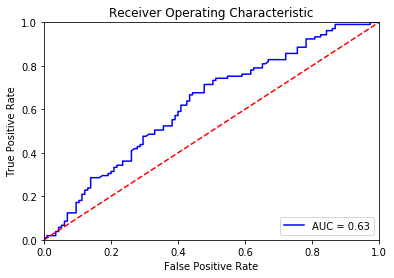

In [129]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 2) MNIST Dataset
Use from sklearn.datasets import fetch_mldata

In [130]:
test_data_home = tempfile.mkdtemp()

In [131]:
digits=datasets.load_digits()

In [132]:
df = pd.DataFrame(data= np.c_[digits['data'], digits['target']])

In [133]:
df=df.rename(index=str, columns={64: "label"})

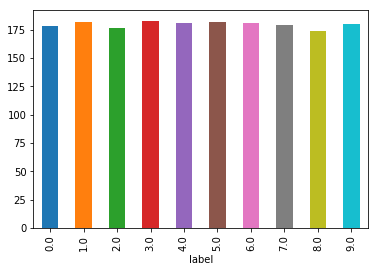

In [134]:
df.groupby('label')[0].count().plot.bar()
plt.show()

In [135]:
y = df.label.values
X = df.drop('label',axis=1).values
X_std = StandardScaler().fit_transform(X)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=1234)

model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [137]:
y_pred=model.predict(X_test)
probs = model.predict_proba(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.9518518518518518
[[47  0  0  0  0  0  0  0  0  0]
 [ 0 54  1  0  0  0  1  0  0  0]
 [ 0  0 53  0  0  0  0  1  0  0]
 [ 0  0  0 55  0  1  0  0  0  0]
 [ 0  1  0  0 63  0  0  1  1  0]
 [ 0  0  0  0  0 58  1  0  0  2]
 [ 1  1  0  0  0  0 50  0  0  0]
 [ 0  0  0  0  0  0  0 50  0  0]
 [ 1  3  1  1  0  0  1  1 38  1]
 [ 0  0  0  0  0  1  0  1  3 46]]
             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98        47
        1.0       0.92      0.96      0.94        56
        2.0       0.96      0.98      0.97        54
        3.0       0.98      0.98      0.98        56
        4.0       1.00      0.95      0.98        66
        5.0       0.97      0.95      0.96        61
        6.0       0.94      0.96      0.95        52
        7.0       0.93      1.00      0.96        50
        8.0       0.90      0.81      0.85        47
        9.0       0.94      0.90      0.92        51

avg / total       0.95      0.95      0.95       540

